In [79]:
__author__ = "Swapna Savalgi"
__copyright__ = "Copyright 2020, IS612_final"
__version__ = "1.0"
__email__ = "ss49907n@pace.edu"

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data handling

In [170]:
input_file = pd.read_csv('business_dynamics.csv')

In [171]:
input_file = input_file.rename(columns = {'Data.DHS Denominator' : 'Denominator','Data.Number of Firms': 'Number_Of_Firms','Data.Calculated.Net Job Creation': 'Job_Creation','Data.Calculated.Net Job Creation Rate':'Job_Creation_Rate','Data.Calculated.Reallocation Rate':'Reallocation_Rate','Data.Establishments.Entered':'Establishments','Data.Establishments.Entered Rate':'Est_Entered_Rate','Data.Establishments.Exited':'Exited','Data.Establishments.Exited Rate':'Exited_Rate','Data.Establishments.Physical Locations':'Physical_Locations','Data.Firm Exits.Count':'Exit_Count','Data.Firm Exits.Establishment Exit':'Firm & Establishment_Exit','Data.Firm Exits.Job Destruction':'Job_Destruction','Data.Job Creation.Births':'Job_Creation_Births','Data.Job Creation.Continuers':'Job_Continuers','Data.Job Creation.Count':'Job_Creation_Count','Data.Job Creation.Rate':'Creation_Rate','Data.Job Creation.Rate/Births':'Job_Creation_Rate_Births','Data.Job Destruction.Continuers':'Destruction_Continuers','Data.Job Destruction.Count':'Destruction_Count','Data.Job Destruction.Deaths':'Destruction_Deaths','Data.Job Destruction.Rate':'Destruction_Rate','Data.Job Destruction.Rate/Deaths':'Destruction_Rate_Deaths'})

In [172]:
input_file.head()

,State,Year,Denominator,Number_Of_Firms,Job_Creation,Job_Creation_Rate,Reallocation_Rate,Establishments,Est_Entered_Rate,Exited,...,Job_Creation_Births,Job_Continuers,Job_Creation_Count,Creation_Rate,Job_Creation_Rate_Births,Destruction_Continuers,Destruction_Count,Destruction_Deaths,Destruction_Rate,Destruction_Rate_Deaths
0,Alabama,1977,933909,52371,46776,5.0,31.0,10634,17.2,8057,...,89869,101653,191522,20.5,9.6,85855,144746,58891,15.5,6.3
1,Alaska,1977,108134,6480,-1940,-1.8,69.4,2028,27.0,1564,...,19259,18286,37545,34.7,17.8,25981,39485,13504,36.5,12.5
2,Arizona,1977,589552,36477,29997,5.1,39.8,9379,22.0,6230,...,70645,76781,147426,25.0,12.0,72063,117429,45366,19.9,7.7
3,Arkansas,1977,529709,35499,42803,8.1,29.0,7291,18.3,5455,...,44527,75201,119728,22.6,8.4,44394,76925,32531,14.5,6.1
4,California,1977,6484959,362887,656693,10.1,33.4,88187,20.7,60589,...,779164,960214,1739378,26.8,12.0,594123,1082685,488562,16.7,7.5


In [173]:
input_file = input_file.drop(columns = ['Job_Creation','Creation_Rate','Reallocation_Rate','Destruction_Count','Exited_Rate','Destruction_Rate','Destruction_Rate_Deaths','Job_Creation_Rate_Births','Job_Creation_Count','Establishments','Est_Entered_Rate','Exited','Physical_Locations','Firm & Establishment_Exit','Job_Destruction','Job_Creation_Births','Job_Continuers','Destruction_Continuers','Destruction_Deaths'])

In [174]:
input_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1887 entries, 0 to 1886
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              1887 non-null   object 
 1   Year               1887 non-null   int64  
 2   Denominator        1887 non-null   int64  
 3   Number_Of_Firms    1887 non-null   int64  
 4   Job_Creation_Rate  1887 non-null   float64
 5   Exit_Count         1887 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 88.6+ KB


In [175]:
new_dict= input_file.to_dict('dict')   #to view it in a nested dictionary form , change the argument to dict
#print(new_dict)

In [176]:
new_dict= input_file.to_dict('index')   #to view it in a index form , change the argument to index
#print(new_dict)

In [177]:
d= input_file.to_dict('list')
print(type(d))


<class 'dict'>


In [178]:
keys_extraction = ['Number_Of_Firms','Exit_Count']   #filtering dictionary contents and extracting only the columns that we want to analyze
X = {k:d[k] for k in keys_extraction} #assigning a new variable which contains the keys and values of the metioned columns
#print(X)

In [179]:
#Histogram
print(type(X))

<class 'dict'>


In [180]:
l = [] 
[l.extend([k,v]) for k,v in X.items()]
#print(l)

[None, None]

In [181]:
l.remove('Number_Of_Firms')
l.remove('Exit_Count')

# Calcualting Measures of Central Tendency

In [187]:
print('The maximum number of firms:',max(l[0]))
print('The maximum exited firms:',max(l[1]))
print('The minimum number of firms:',min(l[0]))
print('The minimum exited firms:', min(l[1]))

The maximum number of firms: 627092
The maximum exited firms: 62297
The minimum number of firms: 6480
The minimum exited firms: 20


In [198]:
import statistics
avg_nof =statistics.mean(l[0])
print('Average number of firms:',avg_nof)
avg_ec = statistics.mean(l[1])
print('Average exit count:',avg_ec)

Average number of firms: 90506.22204557499
Average exit count: 7588.434022257552


# Visualization

We have plotted 4 graphs to understnad the behaviour of each variable:


1. To understand how Denominator is moving when Number of firms increased using scatterplot
2. To visualize the distribution of Number of Firms and Exit Counts, we will work on HIstogram
3. To show which state had the highest denominator back in 1977

Text(0, 0.5, 'Number_Of_Firms')

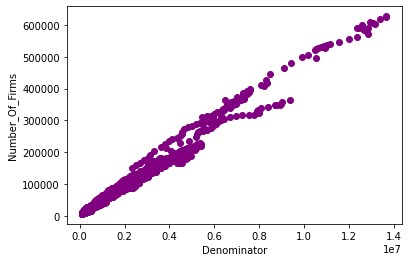

In [216]:
plt.scatter(d['Denominator'],d['Number_Of_Firms'], color = 'purple')
plt.xlabel('Denominator')
plt.ylabel('Number_Of_Firms')

It is strongly correlated to each other .When,Number of firms increaseds,denomitor too has increased. Thus, forming a regression line

To visualize the distribution of Number of Firms and Exit Counts, we will work on HIstogram

Text(0.5, 1.0, 'Total Number of Firms from year 1977 - 2013')

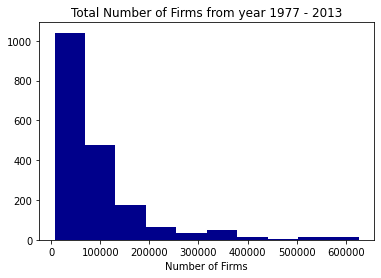

In [200]:
plt.hist(l[0], color ='darkblue')
plt.xlabel('Number of Firms')
plt.title('Total Number of Firms from year 1977 - 2013')

This graph shows that how the values of Number of firms are distributed during the year 1977.In statistic terms, this is right skewed distribution.

Text(0.5, 1.0, ' Firm Exit Counts from year 1977 - 2013')

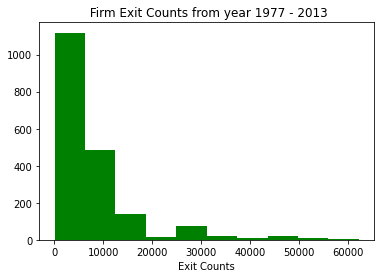

In [201]:
plt.hist(l[1], color ='green')
plt.xlabel('Exit Counts')
plt.title(' Firm Exit Counts from year 1977 - 2013')

Below graphs will show which state had the highest denominator back in 1977

Text(0, 0.5, 'Denominator')

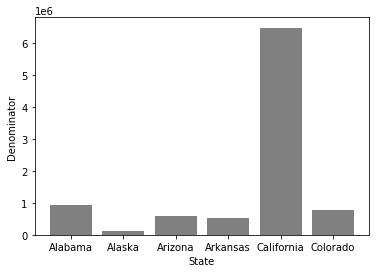

In [234]:
plt.bar(d['State'][0:6],d['Denominator'][0:6],color='Grey')
plt.xlabel('State')
plt.ylabel('Denominator')

California had the highest denominator then Albama.